[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Aug 18 15:05:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 123MB/s] 
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 74.5MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 290.7ms
Speed: 12.3ms preprocess, 290.7ms inference, 1846.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


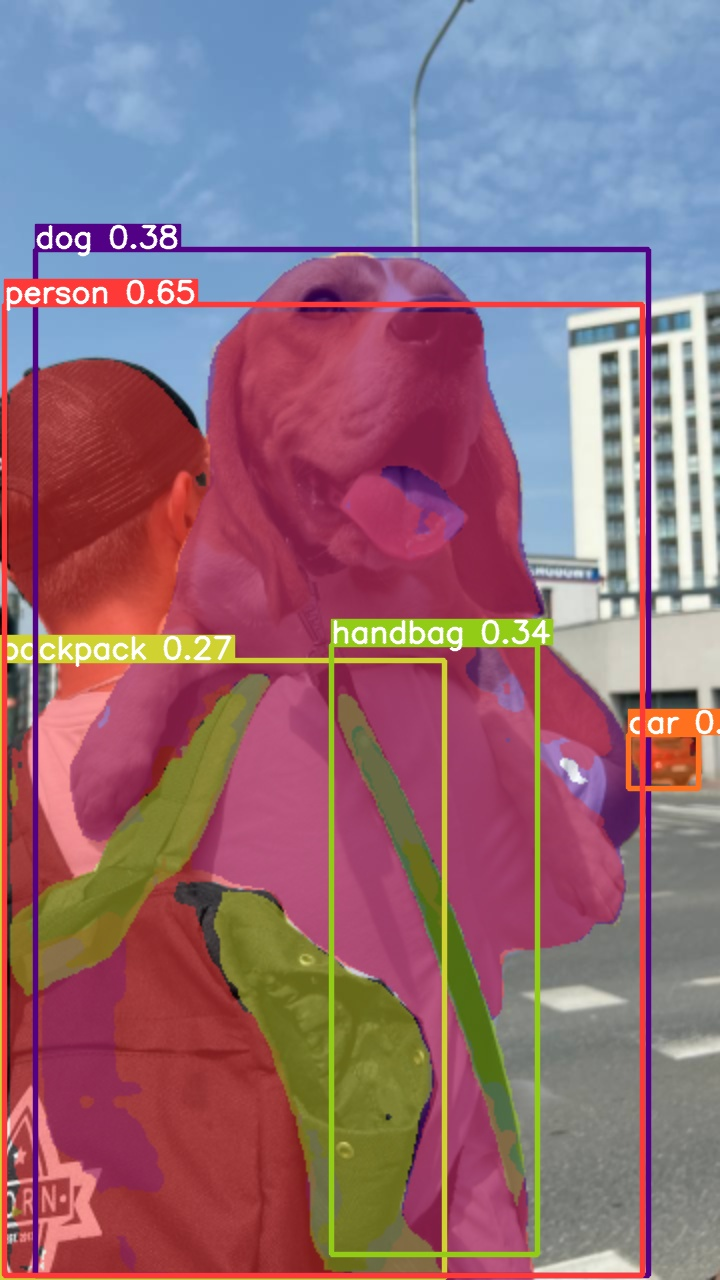

In [7]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [8]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 93.0ms
Speed: 2.0ms preprocess, 93.0ms inference, 623.0ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [12]:
results[0].masks.masks

AttributeError: 'Masks' object has no attribute 'masks'. See valid attributes below.

    A class for storing and manipulating detection masks.

    Attributes:
        xy (list): A list of segments in pixel coordinates.
        xyn (list): A list of normalized segments.

    Methods:
        cpu(): Returns the masks tensor on CPU memory.
        numpy(): Returns the masks tensor as a numpy array.
        cuda(): Returns the masks tensor on GPU memory.
        to(device, dtype): Returns the masks tensor with the specified device and dtype.
    

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="puZDHy0uiY2Fv1qnIU6C")
project = rf.workspace("sankirtana-guntuboina-msdwg").project("segmemtation-kspvc")
version = project.version(1)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to segmemtation-1 in yolov8:: 100%|██████████| 120/120 [00:00<00:00, 3458.39it/s]


## Custom Training

In [16]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/segmemtation-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visua

In [19]:
!ls {HOME}/runs/segment/train2/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    weights
confusion_matrix.png				    results.csv
events.out.tfevents.1723994494.5b0d346f99e5.4898.0  results.png


/content


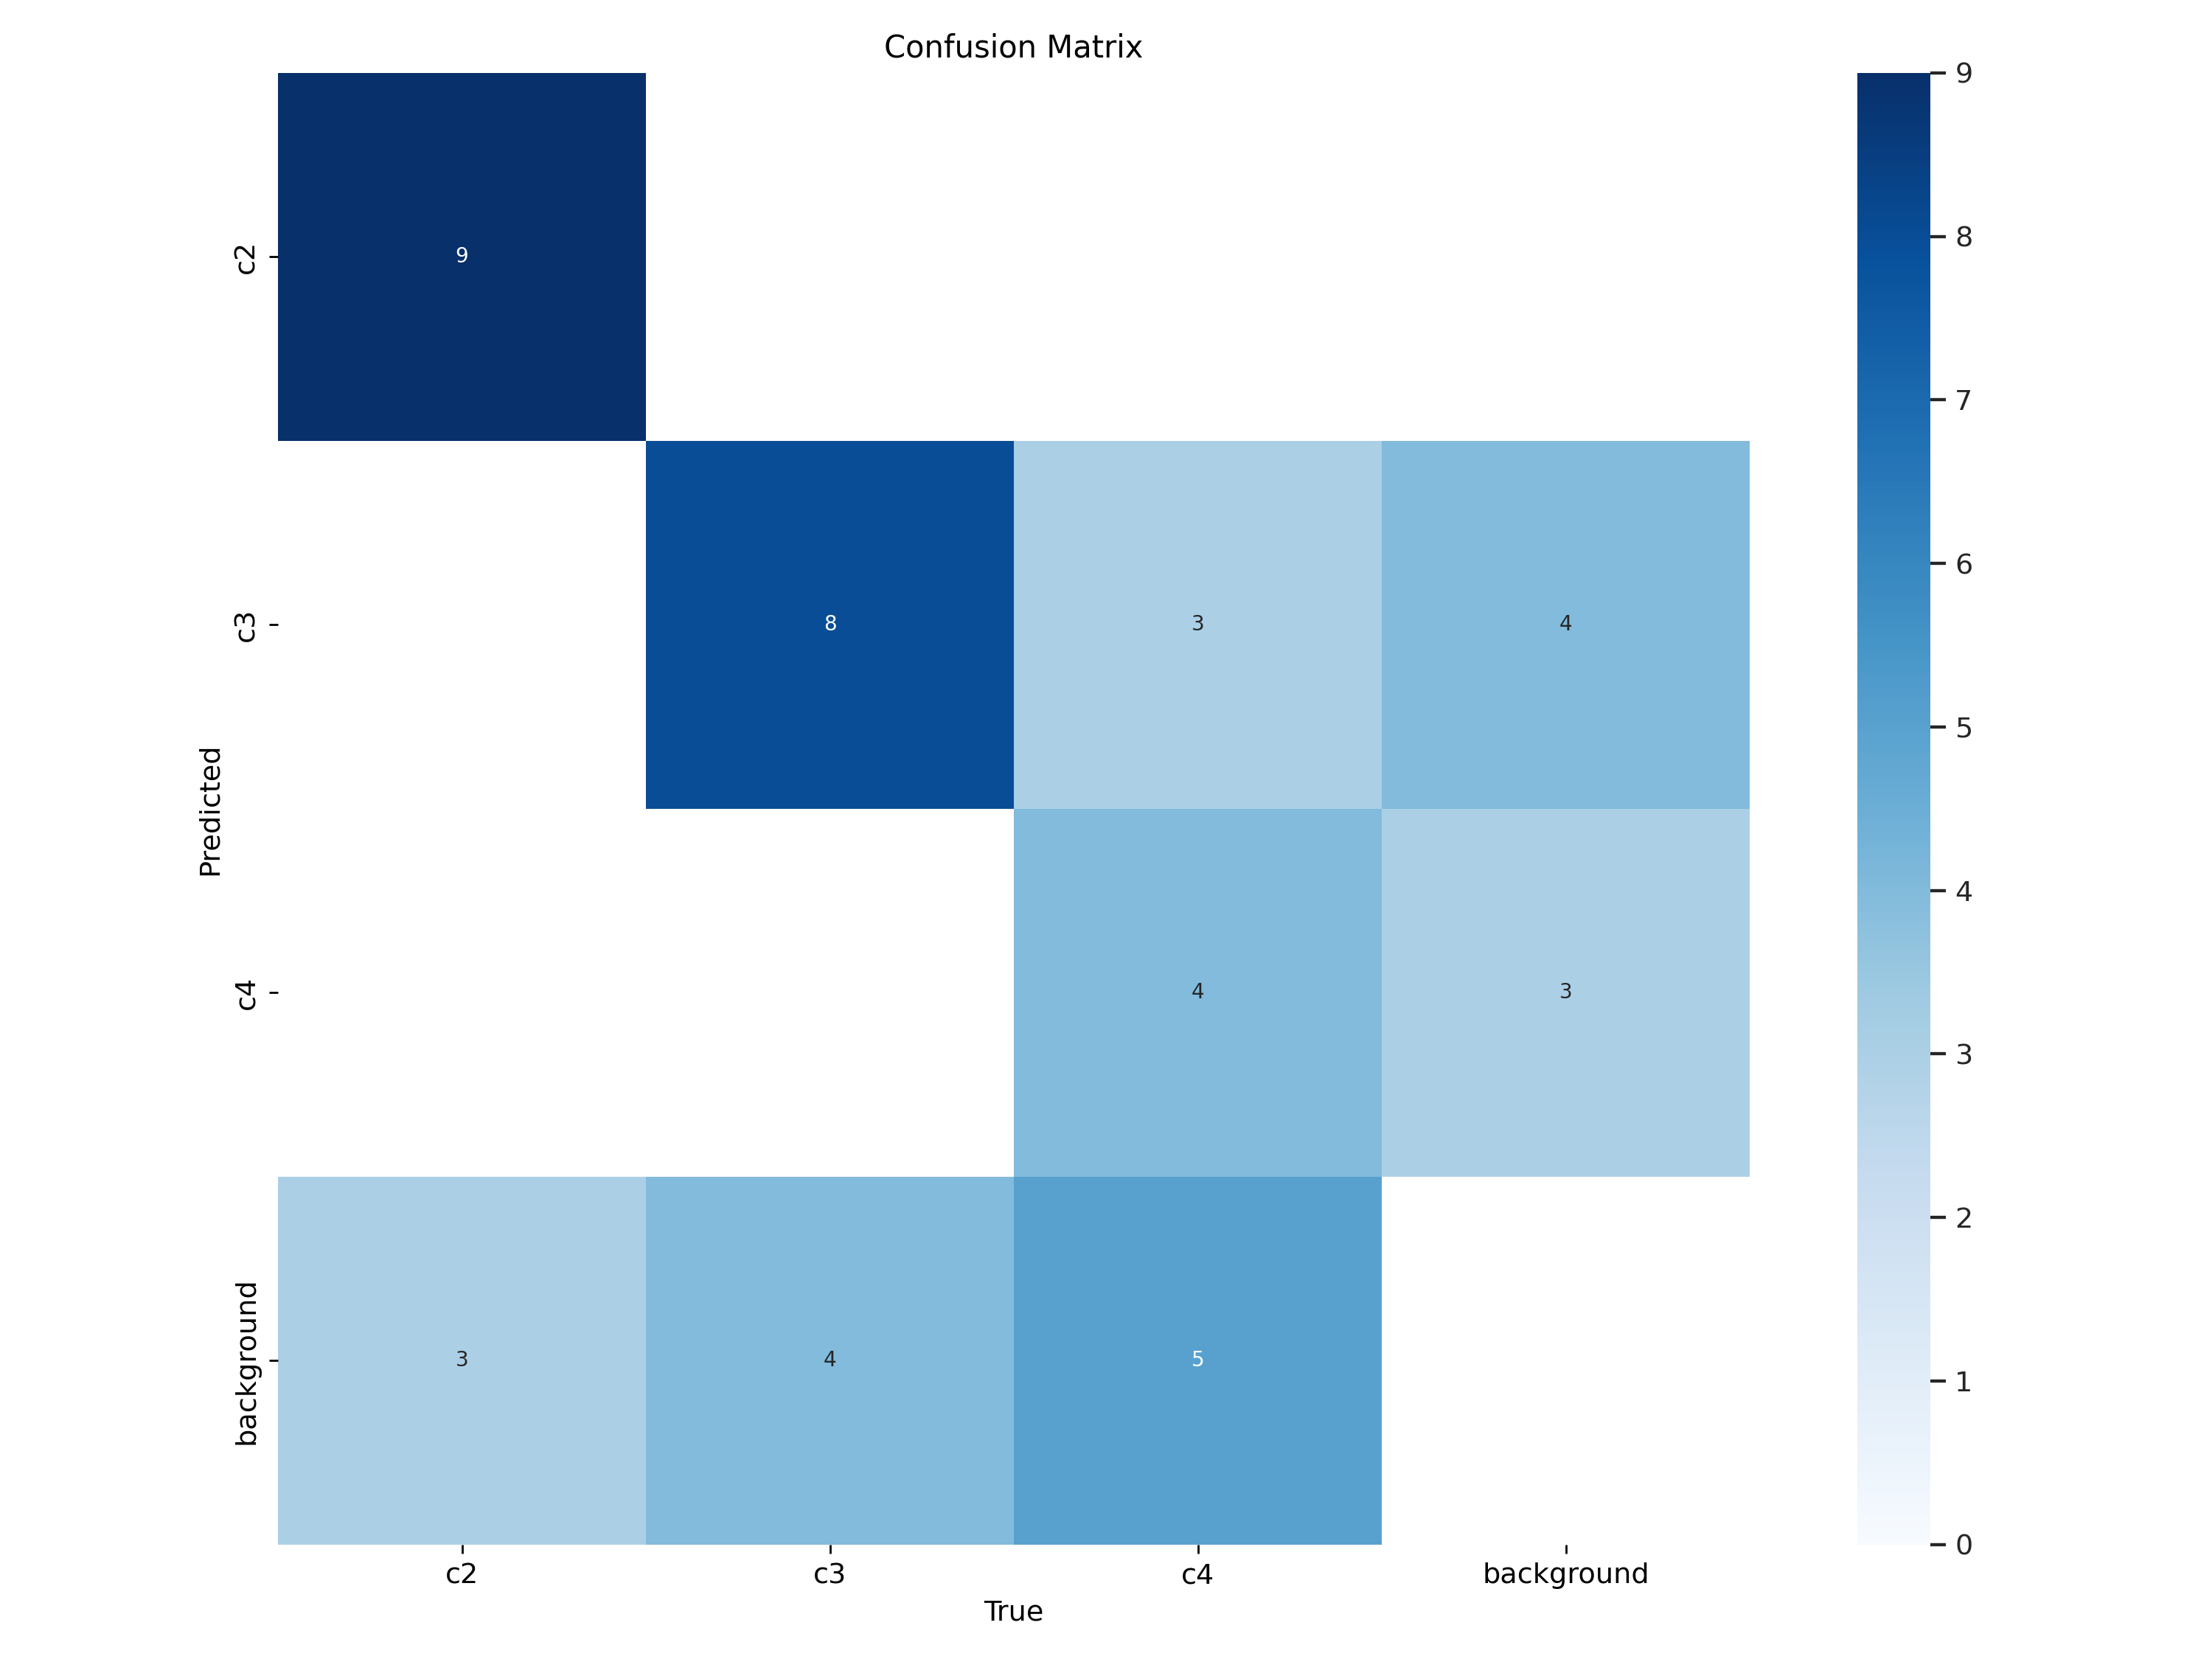

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content


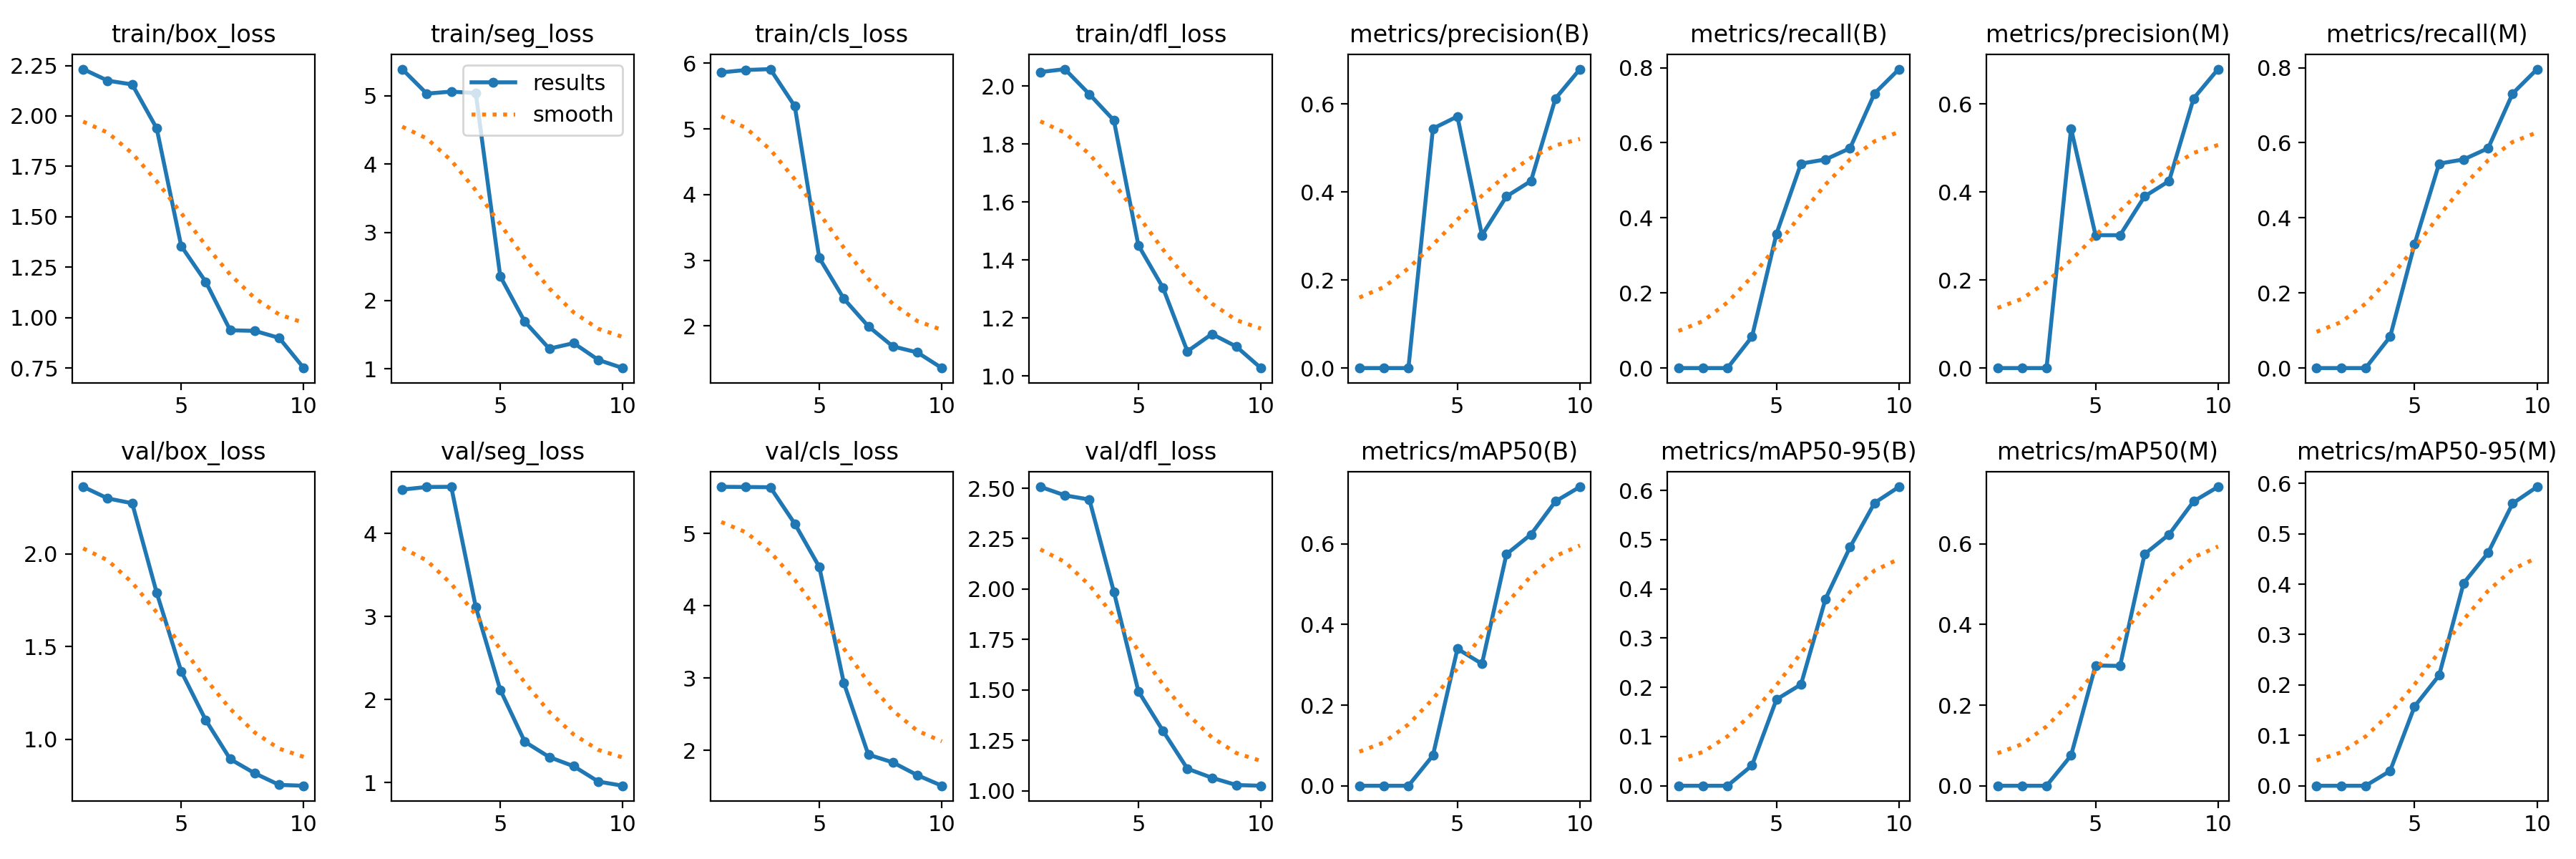

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

/content


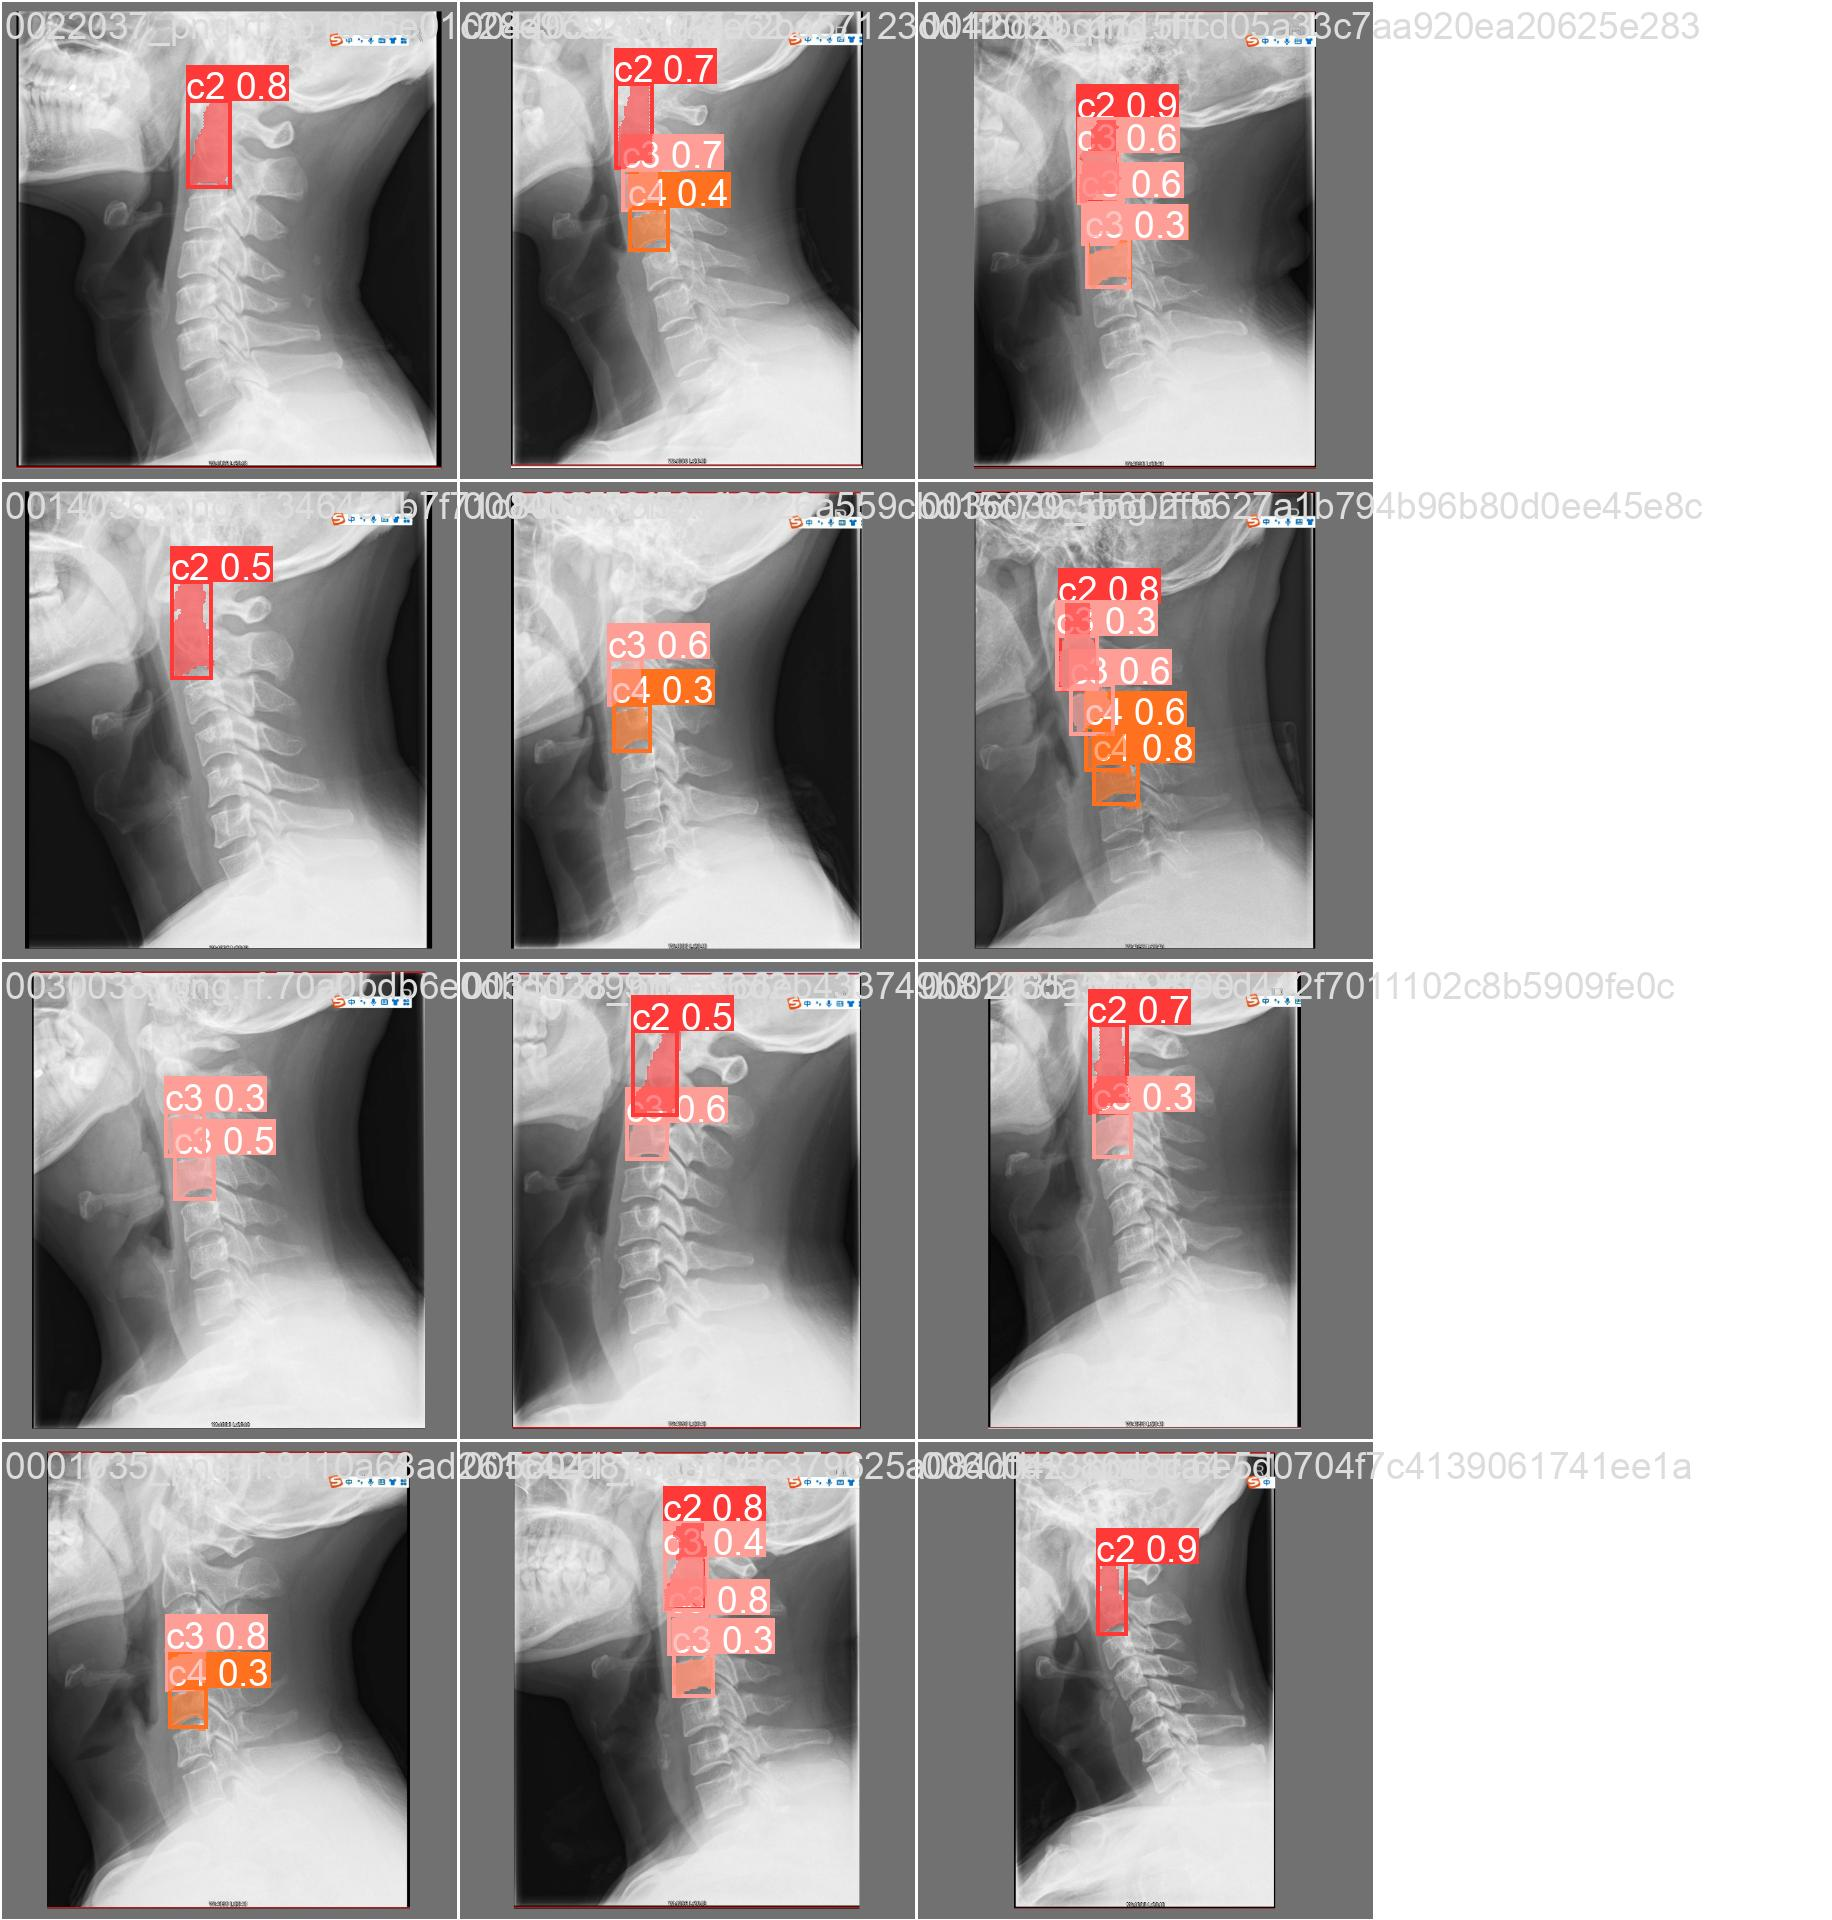

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/segmemtation-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.01it/s]
                   all         12         36       0.68      0.796      0.742      0.608       0.68      0.796      0.742      0.593
                    c2         12         12          1      0.916      0.971      0.723          1      0.916      0.971      0.725
                    c3         12         12      0.514      0.917      0.661      0.599      0.514      0.917      0.661       0.58
                    c4         12         12      0.525      0.554      0.592      0.501      0.525      0.554     

## Inference with Custom Model

In [24]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/5 /content/datasets/segmemtation-1/test/images/0009035_png.rf.57d4b1a7378b19294fe390c23d67fbf1.jpg: 640x512 2 c3s, 1 c4, 87.9ms
image 2/5 /content/datasets/segmemtation-1/test/images/0012036_png.rf.53792dd309ad954daf66cd490a60b167.jpg: 640x512 1 c2, 2 c3s, 16.0ms
image 3/5 /content/datasets/segmemtation-1/test/images/0023037_png.rf.446c9f27760da2dce7f594d27a8279d8.jpg: 640x512 1 c2, 15.9ms
image 4/5 /content/datasets/segmemtation-1/test/images/0029038_png.rf.cf4526f87c2a1c26a912c6bbee362ab0.jpg: 640x544 1 c2, 1 c3, 2 c4s, 101.8ms
image 5/5 /content/datasets/segmemtation-1/test/images/0053041_png.rf.b3ad1abaf6123fd946a116ebe2cda40d.jpg: 640x512 1 c2, 1 c3, 1 c4, 16.6ms
Speed: 2.6ms preprocess, 47.6ms inference, 107.1ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/segment/p

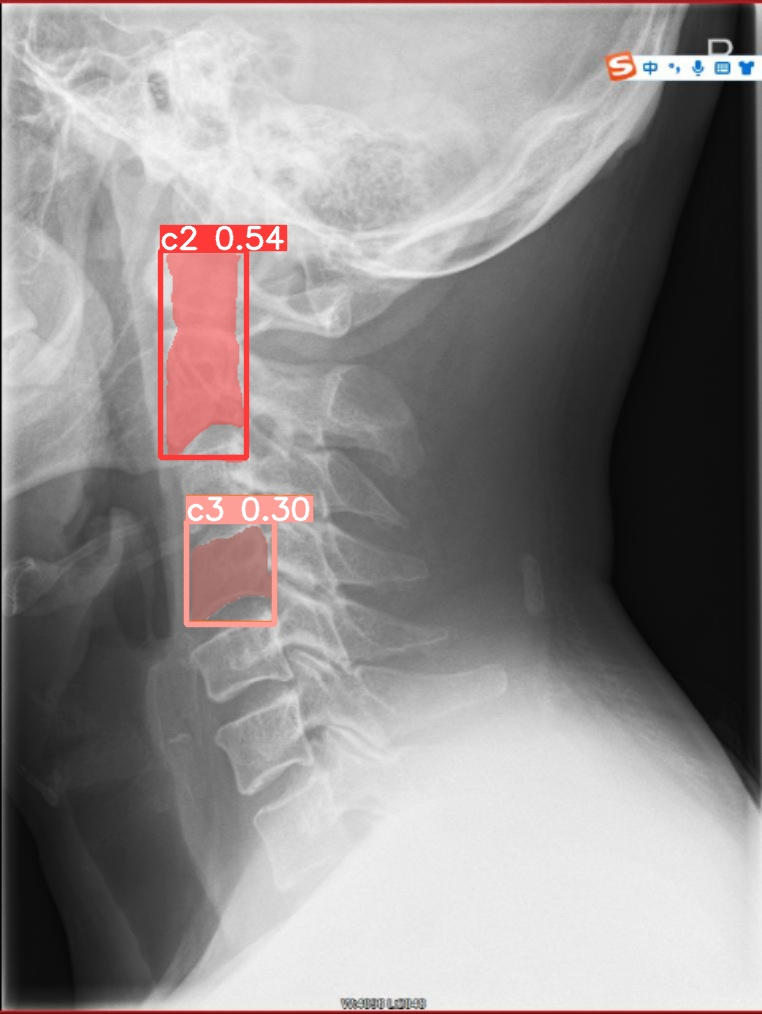

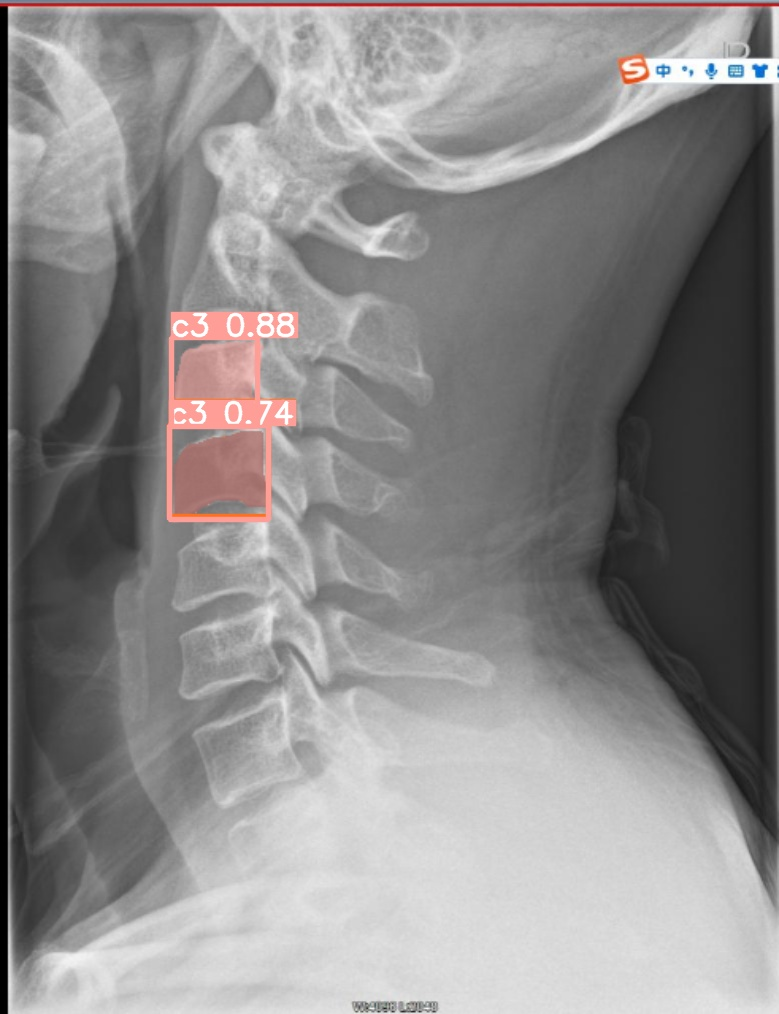

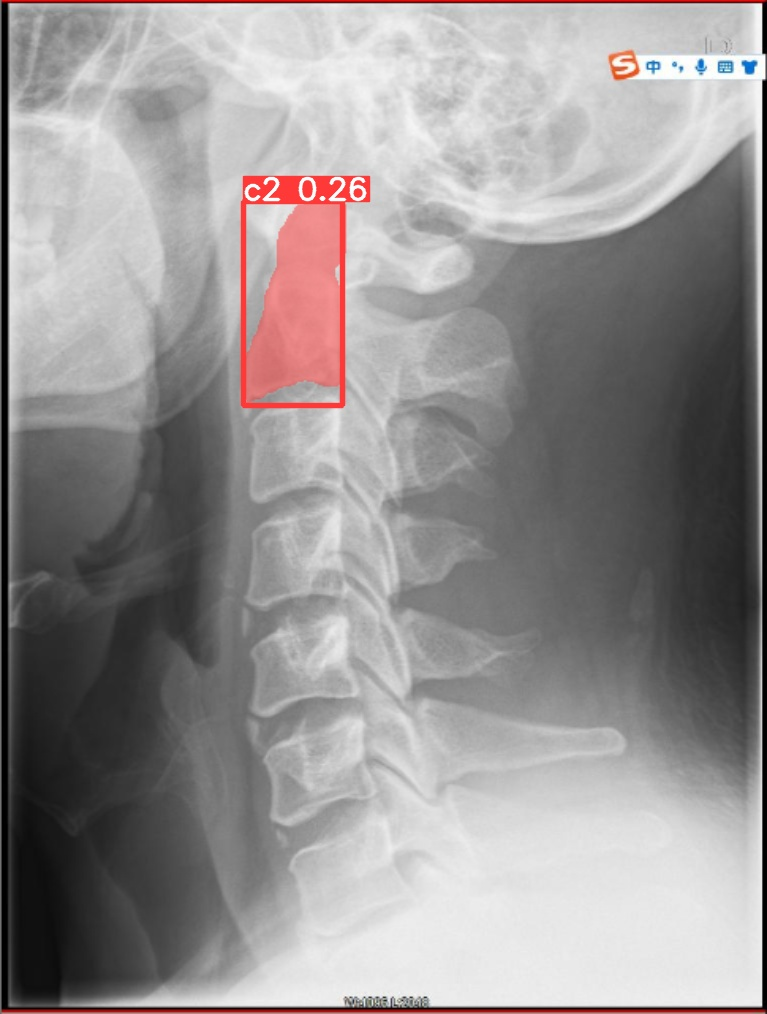

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [26]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train2/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [34]:
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40).json()
pred

running inference on 0023037_png.rf.446c9f27760da2dce7f594d27a8279d8.jpg


{'predictions': [{'x': 294.5,
   'y': 451.5,
   'width': 93.0,
   'height': 107.0,
   'confidence': 0.951708197593689,
   'class': 'c3',
   'points': [{'x': 322.3796875, 'y': 399.26250000000005},
    {'x': 318.784375, 'y': 404.015625},
    {'x': 315.18906250000003, 'y': 404.015625},
    {'x': 313.990625, 'y': 405.6},
    {'x': 312.7921875, 'y': 405.6},
    {'x': 311.59375, 'y': 404.015625},
    {'x': 304.403125, 'y': 404.015625},
    {'x': 303.20468750000003, 'y': 405.6},
    {'x': 287.625, 'y': 405.6},
    {'x': 286.4265625, 'y': 407.18437500000005},
    {'x': 282.83125, 'y': 407.18437500000005},
    {'x': 281.6328125, 'y': 408.76875},
    {'x': 273.24375000000003, 'y': 408.76875},
    {'x': 272.0453125, 'y': 407.18437500000005},
    {'x': 269.6484375, 'y': 407.18437500000005},
    {'x': 267.25156250000003, 'y': 410.35312500000003},
    {'x': 264.8546875, 'y': 410.35312500000003},
    {'x': 263.65625, 'y': 411.9375},
    {'x': 260.0609375, 'y': 411.9375},
    {'x': 258.8625, 'y': 413.

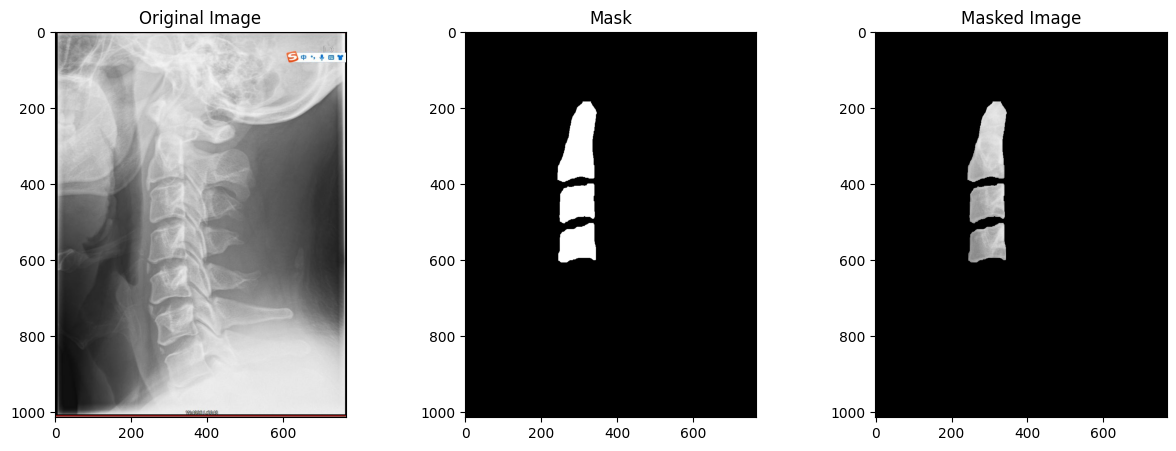

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = pred['predictions'][0]['image_path']
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an empty mask with the same dimensions as the image
mask = np.zeros_like(image_rgb)

# Iterate through the detected instances
for instance in pred['predictions']:
    # Get the polygon points for the mask
    points = np.array([[point['x'], point['y']] for point in instance['points']], dtype=np.int32)
    points = points.reshape((-1, 1, 2))

    # Fill the mask with white color (or any color you like)
    cv2.fillPoly(mask, [points], color=(255, 255, 255))

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image_rgb, mask)

# Plot the original image, mask, and masked image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()


In [36]:
pip install opencv-python numpy pillow


In [38]:
import cv2
import numpy as np
from PIL import Image

# Load the original image
image_path = test_set_loc + random_test_image
image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract the points from the prediction JSON
roi_points = pred['predictions'][0]['points']

# Create a mask with the same dimensions as the image, initialized to 0 (black)
mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)

for instance in pred['predictions']:
    # Get the polygon points for the mask
    points = np.array([[point['x'], point['y']] for point in instance['points']], dtype=np.int32)
    points = points.reshape((-1, 1, 2))

    # Fill the mask with white color (or any color you like)
    cv2.fillPoly(mask, [points], color=(255, 255, 255))

# Extract the ROI from the image using the mask
roi = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Invert the mask to get the non-ROI areas
mask_inv = cv2.bitwise_not(mask)

# Extract the non-ROI areas from the image
non_roi = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_inv)

# Convert the ROI to a PIL Image object for lossless PNG compression
roi_image = Image.fromarray(roi)

# Save the ROI with lossless PNG compression
roi_image.save('roi_lossless.png', format='PNG', optimize=True)

# Convert the non-ROI to a PIL Image object for lossy JPEG compression
non_roi_image = Image.fromarray(non_roi)

# Save the non-ROI with lossy JPEG compression
non_roi_image.save('non_roi_lossy.jpg', format='JPEG', quality=85)

# Combine the lossless and lossy images
roi_lossless = cv2.imread('roi_lossless.png')
non_roi_lossy = cv2.imread('non_roi_lossy.jpg')

print
# Merge the ROI and non-ROI back together
final_image = cv2.add(roi_lossless, non_roi_lossy)

# Save the final compressed image
cv2.imwrite('final_compressed_image.jpg', final_image)

print("Compression applied successfully.")


Compression applied successfully.
